In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('seaborn-colorblind')

In [3]:
dat=pd.read_excel('C:/YellowBelt/Rejects PM.xlsx')

In [4]:
dat.head()

,Reason,tons
0,Spots,80.310
1,Spots,10.000
2,Dust,0.000
3,Holes,9.515
4,Oil spots,4.226


In [5]:
def pareto_chart(dat,category:str,values:str,title=None,percent_to_combne=None):
    
    """ 
    The function for construction Pareto chart. It should receive dataframe consisting of two columns:
    categorical variable and its values. Then it plot a pareto chart 
    dat - DataFrame
    category - the name of categorical column (str)
    values - value of categories (float)
    """
    dat=dat.groupby(by=category).sum() 
    dat=dat.sort_values(by=values,ascending=False) 
    dat['percent']=np.round(dat[values]/dat[values].sum()*100,2) 
    dat['cum_percent']=dat['percent'].cumsum()                   
    dat.reset_index(inplace=True)                               
    
    if percent_to_combne is not None:
        for i in range(dat.shape[0]):
            if dat.iloc[i]['cum_percent']>=percent_to_combne:
                dat.at[i,category]='other'
        
        dat_other=dat[dat[category]=='other']
        dat_other=dat_other.groupby(category).sum()
        dat_other.reset_index(inplace=True)
        dat_other['cum_percent']=100
        dat=dat[dat[category]!='other']
        
        dat=pd.concat([dat,dat_other])
    dat.set_index(category,inplace=True)    
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    dat[values].plot(kind='bar',ax=ax)
    ax.set_ylabel(values)
    ax2=ax.twinx()
    dat['cum_percent'].plot(kind='line',color='red',ax=ax2)
    ax2.set_ylabel('%')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()  

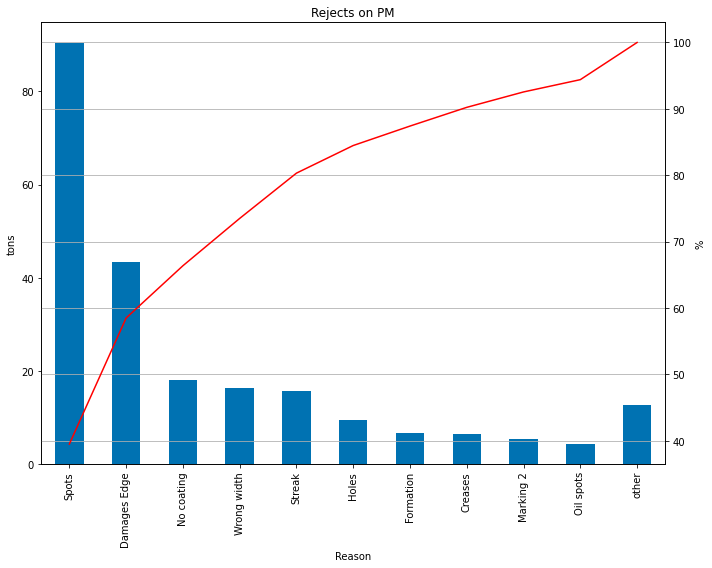

In [6]:
pareto_chart(dat,category='Reason',values='tons',title='Rejects on PM',percent_to_combne=95)

In [7]:
dat_2=pd.read_excel('C:/YellowBelt/Rejected_rolls.xlsx')

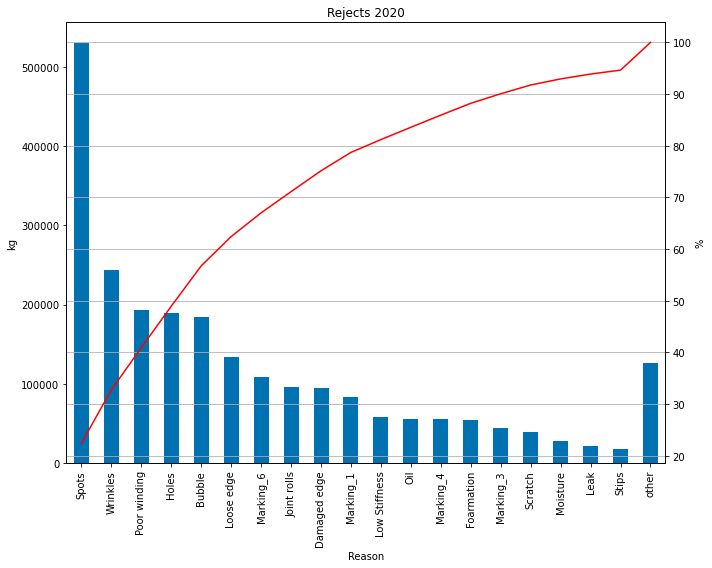

In [8]:
pareto_chart(dat_2,category='Reason',values='kg',title='Rejects 2020',percent_to_combne=95)

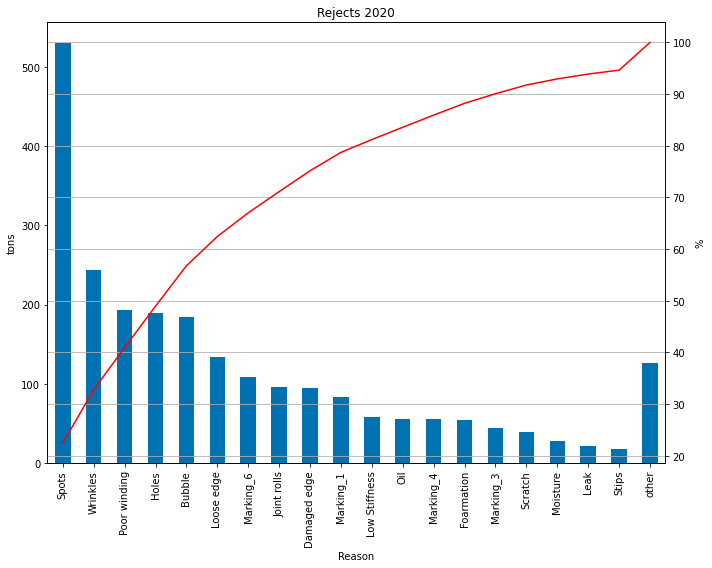

In [9]:
dat_2['tons']=dat_2['kg']/1000

pareto_chart(dat_2,category='Reason',values='tons',title='Rejects 2020',percent_to_combne=95)